# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [22]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",

})
df_titanic = df_titanic[df_titanic["type"] == "passenger"]

In [23]:
pd.crosstab(df_titanic["class"], df_titanic["embarked"],normalize="index")

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [24]:
pd.crosstab(df_titanic["class"], df_titanic["embarked"],normalize="columns")

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [25]:
pd.crosstab(df_titanic["class"], df_titanic["embarked"],normalize="index")

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


70% of 3rd class passengers embarked at Southampton.
54%  of Southampton passengers were in 3rd class.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

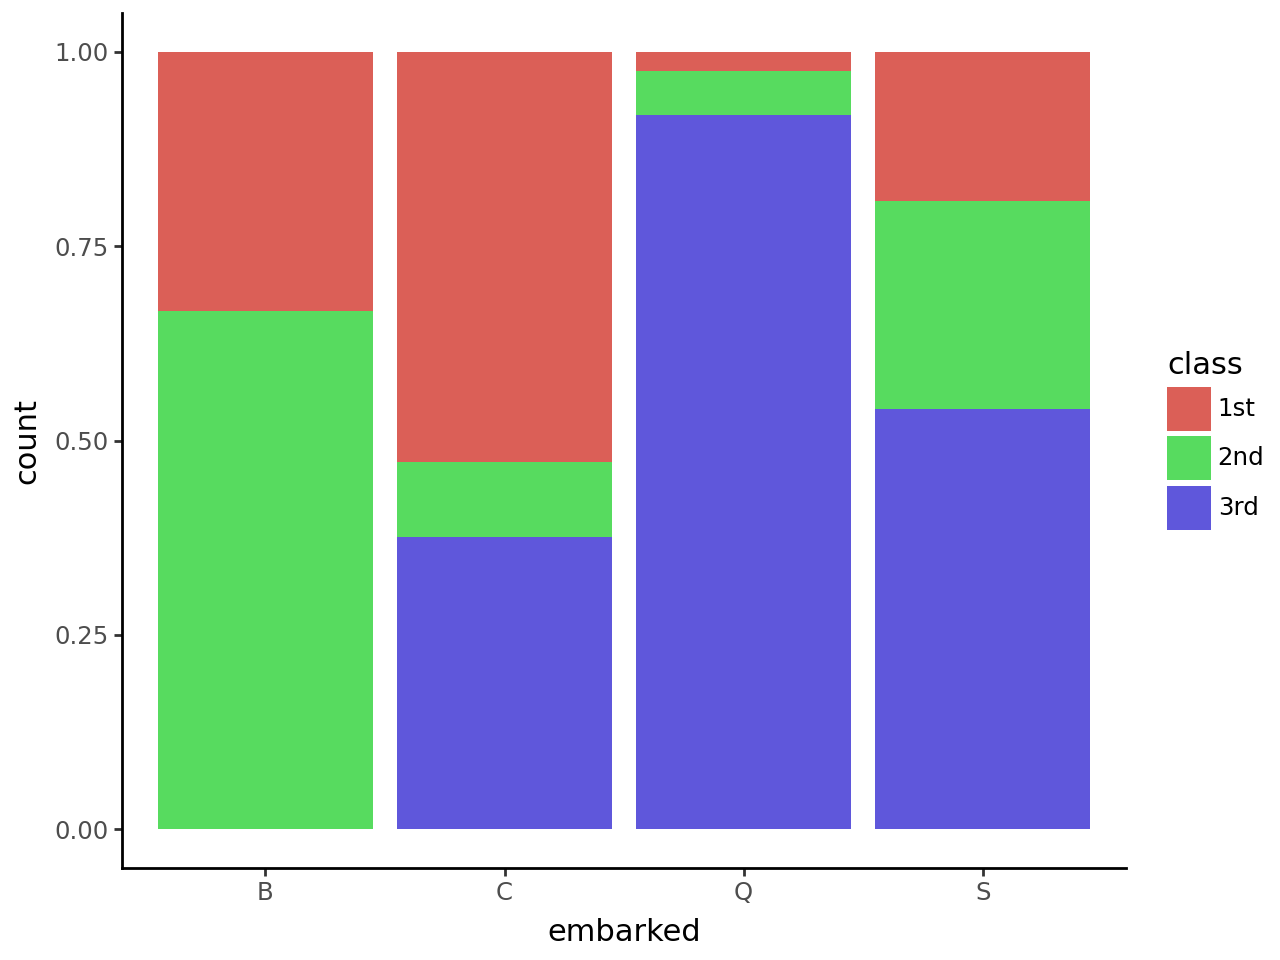

In [35]:
from plotnine import *
(ggplot(df_titanic)+
 aes(x="embarked", fill="class")+
 geom_bar(position="fill")+
 theme_classic())

The pros are we can easily see which port each class emabarked from the most.Also, because each bar is scaled to 100%, you can directly compare within ports rather than being misled by different total passenger counts. Some cons are subtle differences like 41% vs. 44% are hard to judge visually. It can be misleading because you don't know the total number of passengers that get on at each port. For example maybe 3 people total got on at B and they were all first class.